# Fisher information applied to FPM
According to the Cramer-Rao inequality, the covariance matrix of an estimator is bounded by the inverse of the Fisher Information Matrix (FIM)

$C(\theta) \leq \bf{I}^{-1} (\theta)$



## FIM of a Poisson
$f(x|\lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$

In [46]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from fpmsample.simicro import SimMicroscope, NoiseModel
from fpmsample import data, shapes
from phasemath.math import SimImage
import fpmsample.shapes as shapes

lam = 1
n=10
x = np.random.poisson(lam=lam, size=n)
# it = n*ix
ix = 1/lam
it = n/lam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


So the CRLB for the estimators of $\lambda$ is $CRB(\lambda) = \mathcal{I}^{-1}(\lambda)=\lambda/n$

## Applied to an image sensor
Let's begin by implementing the fundamental model, where the only source of randomness lies in the poisson noise of the photon arrival. In this case, the information matrix is

\begin{equation}
\mathcal{I}(\theta) = \int_{t_0}^{t}\int_{\mathcal{R}^2} \frac{1}{\Lambda_{\theta}(\tau) f_{\theta, \tau}(x, y)} \left( \frac{\partial[\Lambda_\theta (\tau) f_{\theta, \tau}(x, y)]}{\partial\theta}\right)^T \left( \frac{\partial[\Lambda_\theta (\tau) f_{\theta, \tau}(x, y)]}{\partial\theta}\right) dx dy d\tau
\end{equation}

## Generating Noisy images

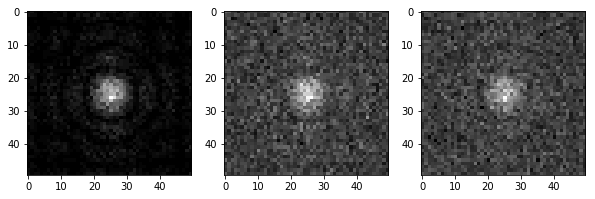

In [118]:
def add_camera_noise(image_array, expossure_time):
    sigmar = 100
    mur = 0
#     gaussian_noise = gr*(sigmar*np.random.randn(*image_array.shape) + mur)
    gaussian_noise = np.random.normal(mur, sigmar, size)
    gp = 1
    dD = 100
    lambdas = (np.abs(image_array)+dD)*expossure_time
    noisy_image = np.random.poisson(lam=lambdas, size=image_array.shape)
    noisy_image = noisy_image/expossure_time
    return noisy_image

            
size = (50, 50)
lam = 30
s = shapes.Circle(dim=50, radius=4, ft=True).draw(0, 0)
x = np.random.poisson(lam=np.abs(s)*lam, size=size)
b = np.random.poisson(lam=15, size=size)
r = np.random.normal(0, 1.5, size)
s = x+r+b
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(x, cmap='gray')
axes[1].imshow(s, cmap='gray')
axes[2].imshow(add_camera_noise(x, expossure_time=5), cmap='gray')
plt.show()

## Applied to simulated FPM images


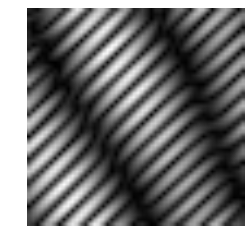

In [98]:
size = 50
simulated_image = SimImage(size=size, max_elements=5)
simimage = simulated_image.array
plt.imshow(np.abs(simimage), cmap='gray', interpolation='bilinear')
plt.axis('off')
plt.show()


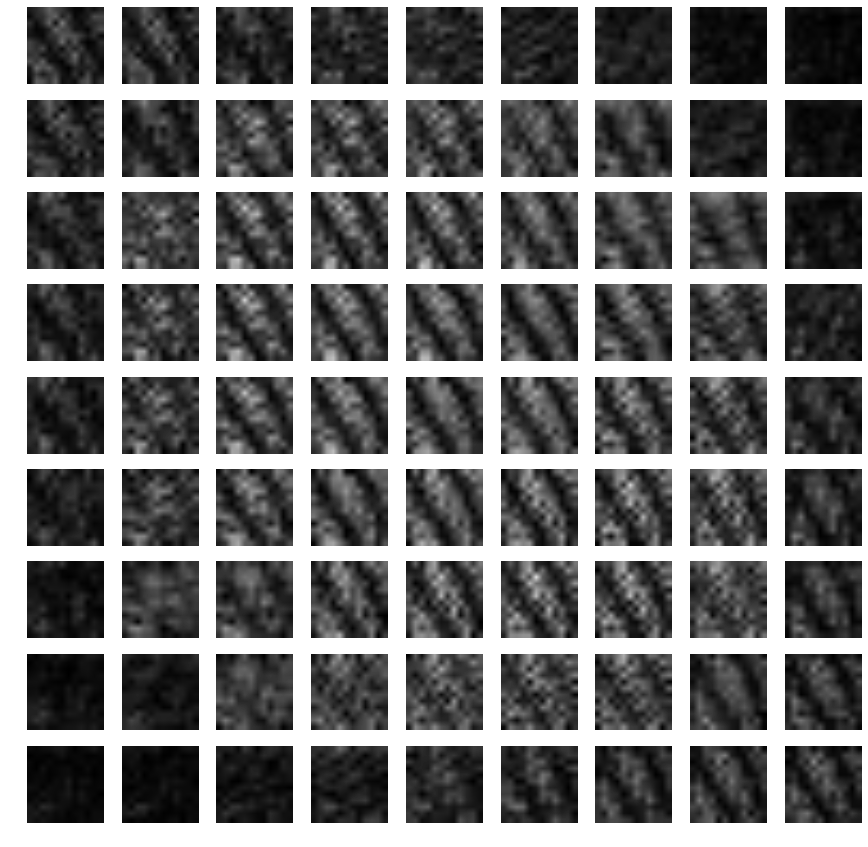

In [100]:
noise_model = NoiseModel(sigmam=[.0, .0])
cfg = data.cfg_load()
sm = SimMicroscope(noise_model=noise_model, cfg=cfg, simulated_image=simimage)
sm.generate_samples()
rm = SimMicroscope.from_dirname(dirname=sm.dirname)
delta_gk, centers = rm.get_phaseopt_input()

## Ploting the simulated captures
nl = 9
fig, axes = plt.subplots(nl, nl, figsize=(15, 15))
iterpoints = sm.iterator()
for im in delta_gk[:nl**2]:
    p = next(iterpoints)
    axy = p.yp-15+nl//2
    axx = p.xp-15+nl//2
    axes[axy][axx].imshow(np.real(im), cmap='gray', interpolation='bilinear', vmax=cfg.max_photon_flux)
    axes[axy][axx].axis('off')
